In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pywt
import seaborn as sns
import csv
import glob
import librosa as librosa
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score
import time


In [5]:
featues_stacked_df = pd.DataFrame()
for i, label in enumerate (["fall", "run", "walk","sitdown","standup"]):
    filepath1 = '/Users/shreyu/Desktop/proiject/model_3/my_model/Untitled Folder/'+str(label)+'_STFT_2sec_test.csv'
    data_frame = pd.read_csv(filepath1)
    featues_stacked_df = pd.concat([featues_stacked_df, data_frame], ignore_index=True)

In [6]:
def annonation_time_split (data,time_ms):
    annonation_label_df = pd.DataFrame()
    count=0
    for i in range (0,len(data),int(time_ms)):
        count+=1
        annonation_label_df = pd.concat([annonation_label_df, data[i:i+time_ms].mode()], ignore_index=True)
    print(count)
    return annonation_label_df

In [7]:
annonation_label_df = pd.DataFrame()
count=0
for i in range (0,len(featues_stacked_df['Activity']),int(10)):
    count+=1
    annonation_label_df = pd.concat([annonation_label_df, featues_stacked_df['Activity'][i:i+10].mode()], ignore_index=True)

In [8]:
DWT_features_200ms=pd.DataFrame()
count=0
for k in range (0,featues_stacked_df.shape[0],10):
    count+=1
    DWT_features_200ms = pd.concat([DWT_features_200ms,
                                    pd.DataFrame(np.array((featues_stacked_df.drop(columns=['Activity'])[k:k+10]))
                                                 .ravel()).T], axis=0, ignore_index=True)
count

398

In [9]:
featues_stacked_df

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Activity
0,13110.806900,6818.939591,5521.692338,18249.352422,18947.226891,5856.499392,701.152293,1255.863897,534.521086,205.171341,...,0.644690,1.081518,0.287228,0.134133,0.063904,0.017674,0.515985,1.215166,1.096699,NoActivity
1,588.215155,403.380007,437.521489,760.631352,146.274304,8.187458,40.481643,16.134169,2.494958,0.650356,...,0.205253,0.668463,0.293304,0.017741,0.061175,0.160340,0.248282,0.252579,0.561588,NoActivity
2,2.473344,89.526038,66.489482,25.261976,54.147980,25.572241,7.761700,11.306639,0.821749,0.961625,...,53.992139,146.704794,98.467768,31.164829,1.596558,9.892560,3.303762,9.181467,20.251207,NoActivity
3,57410.036636,175128.947913,240541.210175,102410.532902,8765.128483,1410.885427,739.454819,313.744917,323.609091,81.072824,...,0.352197,0.526350,0.535786,0.173021,0.021697,0.007166,0.080860,0.223465,0.357261,fall
4,64.677884,567.324071,546.945742,314.662199,149.635695,24.415198,5.107522,6.196917,3.314079,0.442664,...,0.772331,0.091506,0.012213,0.019677,0.034606,0.074596,0.000784,0.078317,0.208167,NoActivity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,41.925577,161.704867,732.454052,1235.332616,219.383048,299.269070,14.094691,6.221906,0.930026,1.621386,...,1.654708,1.336496,1.391923,0.249781,0.098012,0.170591,0.041148,0.573636,2.116185,NoActivity
3976,143.869192,76.126459,76.716029,240.681757,44.012112,6.588546,4.920178,0.014072,0.631999,0.618861,...,1.310897,0.686216,1.368925,0.353003,0.072927,0.025000,0.008646,0.762248,1.150695,NoActivity
3977,33.290488,42.766555,583.521244,202.313219,109.260915,149.616852,24.844529,1.002211,0.262386,0.751583,...,3.095676,1.789687,0.575367,0.582934,0.039139,0.245853,0.871412,0.761532,0.073253,NoActivity
3978,17.050275,196.700377,843.108433,864.611538,867.062453,340.686701,39.062550,33.972652,30.411200,11.602657,...,1.328414,0.196291,0.926305,0.301825,0.093852,0.227765,1.132700,0.802245,0.059173,NoActivity


In [10]:
featues_stacked_df = featues_stacked_df[~featues_stacked_df['Activity'].str.contains('NoActivity')]

In [11]:
featues_stacked_df['Activity'].unique()

array(['fall', 'run', 'walk', 'sitdown', 'standup'], dtype=object)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(featues_stacked_df.drop('Activity', axis=1),
                                                    featues_stacked_df['Activity'], test_size=0.20)

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [42]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [70,100,120],
    'max_depth': [20,25],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=0)

# Perform 10-fold cross-validation with parameter grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameters and best score from the cross-validation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 120}
Best Cross-Validation Score: 0.6665865384615385
Test Set Accuracy: 0.6172839506172839


In [39]:
# Make predictions on the test data
y_pred = best_model.predict(x_test)
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')


plt.show()

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')


Accuracy: 0.62
F1 Score: 0.61
Recall: 0.62
Precision: 0.62


In [40]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

        fall       0.81      0.85      0.83        20
         run       0.52      0.34      0.41        44
     sitdown       0.55      0.55      0.55        22
     standup       0.75      0.55      0.63        22
        walk       0.61      0.83      0.70        54

    accuracy                           0.62       162
   macro avg       0.65      0.62      0.62       162
weighted avg       0.62      0.62      0.61       162



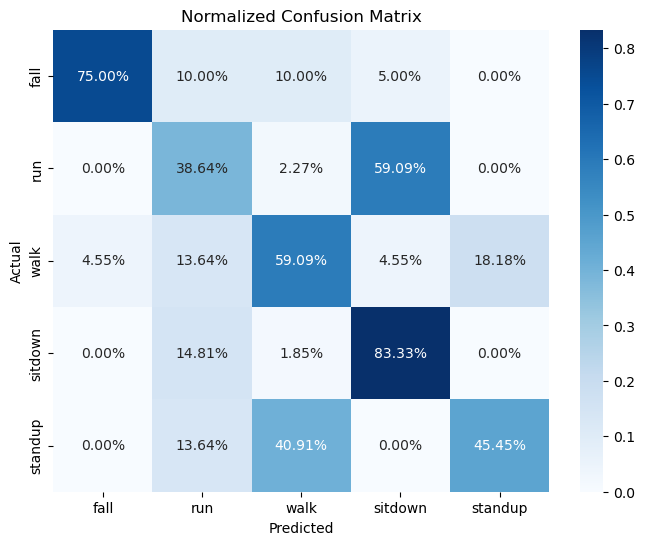

In [47]:
y_pred=best_model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test,y_pred, labels=("fall", "run", "sitdown","walk","standup"),normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap='Blues', fmt=".2%", xticklabels=["fall", "run", "walk","sitdown","standup"], yticklabels=["fall", "run", "walk","sitdown","standup"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()